# Used Cars Price Prediction

**Author: Jasreman Singh**

## Problem Definition

### The Context:
 - India's used car market has surpassed the new car market in the recent past, driven by a slowdown in new car sales and a growing consumer preference for pre-owned vehicles. Therefore, there is a great opportunity for Cars4U, a budding tech startup. However, unlike the new car market with its relatively stable pricing and controlled supply, the used car market is characterized by high uncertainties. Factors like mileage, brand, model, and year significantly influence a car's value, making it challenging for sellers to determine the correct asking price.
 - It is important to solve this problem as accurately predicting used car prices could offer several key advantages:
   - increased seller revenue,
   - reduced inventory turnover time,
   - enhanced customer satisfaction, and
   - market growth and stability.
 - By developing a solution to predict used car prices effectively, Cars4U can empower sellers with valuable insights. This can establish them as a trusted partner in the used car market, attracting more sellers and buyers to their platform.  Furthermore, this data-driven approach can revolutionize the used car buying and selling experience in India.

### The objective:

 - This project aims to develop a used car pricing model that predicts market values accurately. This will empower business stakeholders to implement profitable differential pricing strategies, maximizing revenue and market competitiveness.

### The key questions:
 - The key questions that need to be addressed to build an effective and reliable solution are as follows:
   - How can we ensure the accuracy and completeness of the data collected? (e.g., handling missing values, outlier detection)
   - What features are most relevant for the business stakeholders to allow for more targeted pricing and marketing strategies?
   - What machine learning algorithm is best suited for a used car price prediction which could enable business stakeholders to set optimal prices for each vehicle, leading to increased revenue through data-driven pricing strategies?
   - How could we handle categorical features like make and model effectively?
   - How could we account for geographical variations in used car prices across India?
   - What metrics will be used to evaluate the performance of the price prediction model?
   - How can the model's insights be presented to users in a clear and actionable way?

### The problem formulation:
 - The current approach of used car valuation lacks objectivity and is inefficient. A data science approach offers a more scalable, efficient, and unbiased solution for used car price prediction. It will be beneficial for the stakeholders in market, which could lead to a more efficient and transparent used car buying and selling experience.
 - By leveraging the power of data science, a used car price prediction model that considers a multitude of relevant features and market data could be developed. This model could:
   - Analyze large datasets of used car listings to identify key factors influencing price.
   - Learn from historical sales data to understand market trends and price fluctuations.
   - Predict the fair market value of a used car based on its specific features and condition.
 - This approach could lead to improved efficiency, market transparency, and competitive advantage to the business stakeholders.

### Data Dictionary

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### Loading libraries

In [1]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings, sys, re
warnings.filterwarnings("ignore")

# Importing libraries for building models and calculating metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Let us load the data

In [2]:
df = pd.read_csv('used_cars.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [3]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


## Data Overview

- Observations
- Sanity checks

In [4]:
print(f"Shape of the dataset --> {df.shape}.")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe.")

Shape of the dataset --> (7253, 14).
There are 7253 rows and 14 columns in the dataframe.


In [5]:
print(f"The number of duplicate rows are: {df.duplicated().sum()}.")

The number of duplicate rows are: 0.


In [6]:
print("The datatypes in the dataframe are:\n")
df.info()

The datatypes in the dataframe are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [7]:
print("The number of rows with missing values associated with each of the columns is as follows:\n")
df.isnull().sum()

The number of rows with missing values associated with each of the columns is as follows:



S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

The **Solutions** to these questions have been provided here.

**Statistical Summary**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


Based on the summary statistics of the numeric variables in the dataset, following insights can be extracted:
- The min and max values of the 'S.No.' column, it seems to have as many values as rows (this column could be dropped after investigation).
- The mean and median value of 'Kilometers_driven' are quite far away from the max value (there could be some outliers in this column).
- The minimum 'Mileage' has been reported as 0 which cannot be true (further investigation needs to be done).
- The column 'New_Price' has so many missing values (it might make sense to drop the column, but can be investigated).
- The target variable --> 'Price' has missing values as well. It will make sense to filter out the rows as if we impute the values it will most likely add bias to the model.

In [9]:
df.describe(include=['object']).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


Based on the summary statistics of the categorical variables in the dataset, following insights can be extracted:
- The number of unique values in the 'Name' column is 2041 and the mode value is 'Mahindra XUV500 W8 2WD'.
- The number of unique locations (cities) in the 'Location' column is 11 with 'Mumbai' being the mode.
- Similarly, there are 5 unique fuel types, 2 unique transmission types, and 4 unique owner types.

In [10]:
# Sorting values according to 'Kilometers_Driven'.
df.sort_values(by=['Kilometers_Driven'], ascending = False).head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.0
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.5
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.9
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.7
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.0


 - It is quite abnormal for a car to have that many 'kilometers driven' considering the car was manufactured in the year 2017. It is definitely an outlier value and can be removed from the dataset

In [11]:
df = df.drop(df.iloc[2328]['S.No.'])

In [12]:
# Number of unique values for the 'S.No.' column.
df['S.No.'].nunique()

7252

 - There are as many S.No. values as many rows. It will make sense to drop it off.

In [13]:
df = df.drop('S.No.', axis = 1)

In [14]:
# Sorting values according to Mileage.
df.sort_values(by=['Mileage'], ascending = True).head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN


In [15]:
df[df['Mileage']==0].shape

(81, 13)

 - There are 81 rows where the 'Mileage' value is 0. The rows with missing values can be removed or the missing 'Mileage' value can be imputed based on the 'Name' column. We can investigate this later.

## Univariate Analysis

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

 - We use this function to create a histogram and boxplot

In [16]:
def histogram_boxplot(data, feature, figsize = (8, 5), kde = True, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

def countplot(data, feature):
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x = feature, hue = feature, legend=False)

    # Get total count
    total_count = len(df)
    
    # Calculate percentages for each category
    for bar in plt.gca().patches:
      height = bar.get_height()
      percentage = (height / total_count) * 100
      plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.1f}%\n", ha='center', va='bottom')
    plt.xticks(rotation=90)
    plt.show();

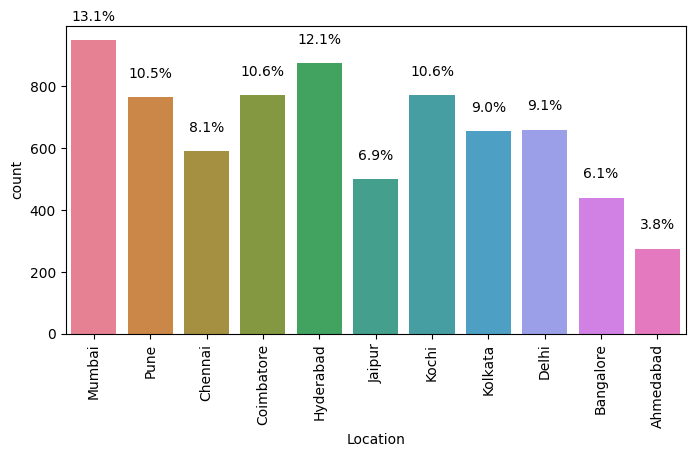

In [17]:
countplot(df, 'Location')

 - The count plot for 'Location' column suggests that there are 11 unique cities, and Mumbai has the over 13% of used cars.

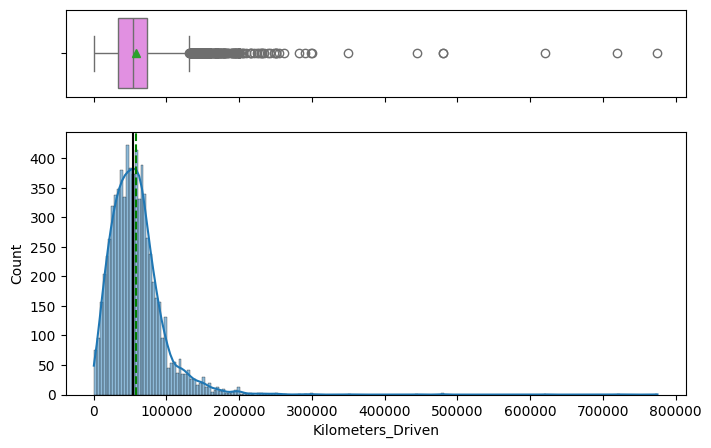

In [18]:
# Now we look at the 'Kilometers Driven' column.
histogram_boxplot(df, 'Kilometers_Driven')

 - The histogram boxplot for the 'Kilometers Driven' column suggests that the distribution is heavily right-skewed. It will make sense to use log transformation to the column to reduce skewness as one of the assumptions of linear regression model is that distribution for the dependent and independent variables should be normal.

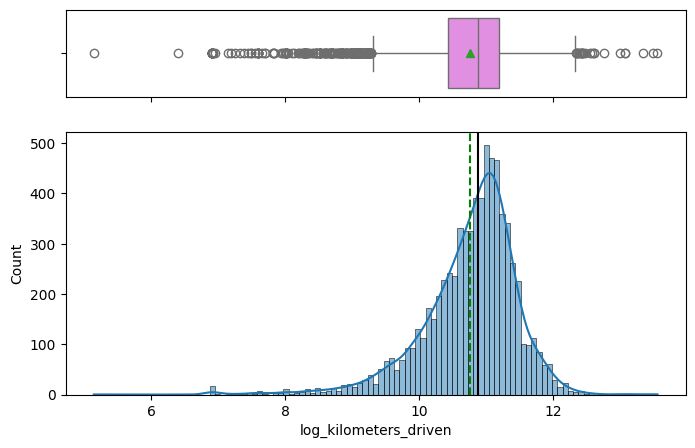

In [19]:
df['log_kilometers_driven'] = np.log(df['Kilometers_Driven'])
histogram_boxplot(df, 'log_kilometers_driven')

- Using the log transformation reduces the skewness and normalizes the distribution, so it will make sense to add the transformed variable column into the dataset. 

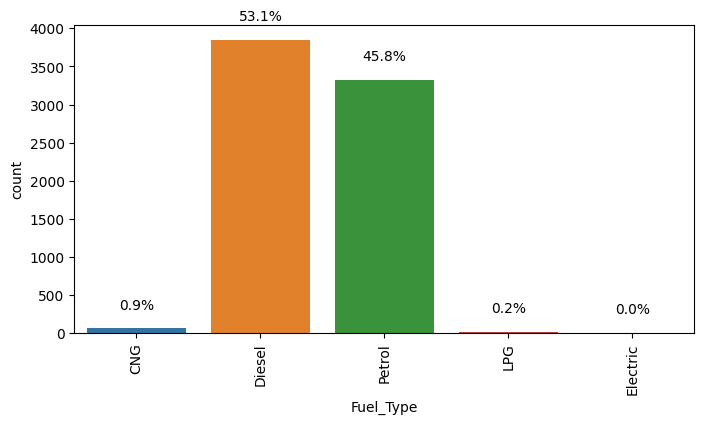

In [20]:
countplot(df, 'Fuel_Type')

 - The countplot for 'Fuel Type' suggests that Petrol and Diesel cars account for almost 99% of the used cars, and electric cars are the least.

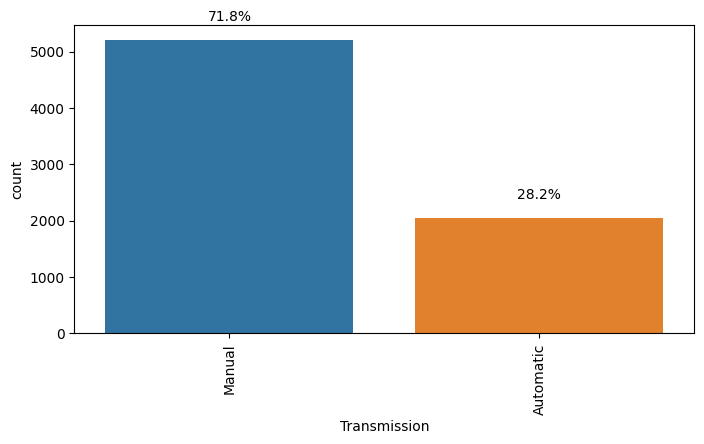

In [21]:
countplot(df, 'Transmission')

 - Around 72% of the cars are Manual Tranmission.

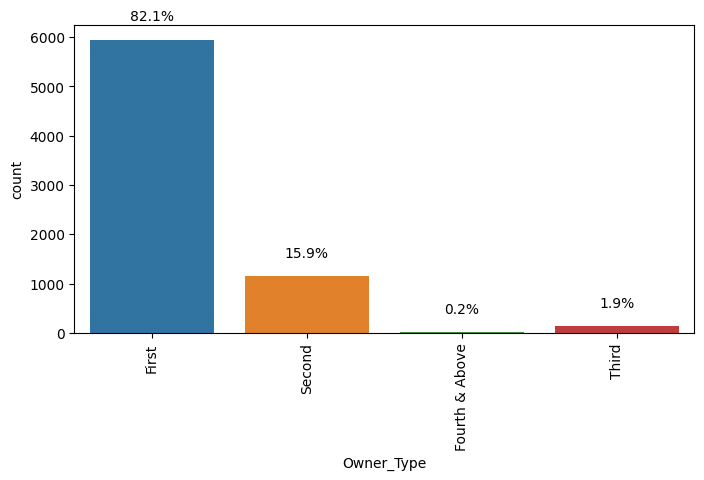

In [22]:
countplot(df, 'Owner_Type')

 - Over 82% of owners are First Owners for the pool of used cars dataset that we have, and around 0.2% of owners are fourth and above.

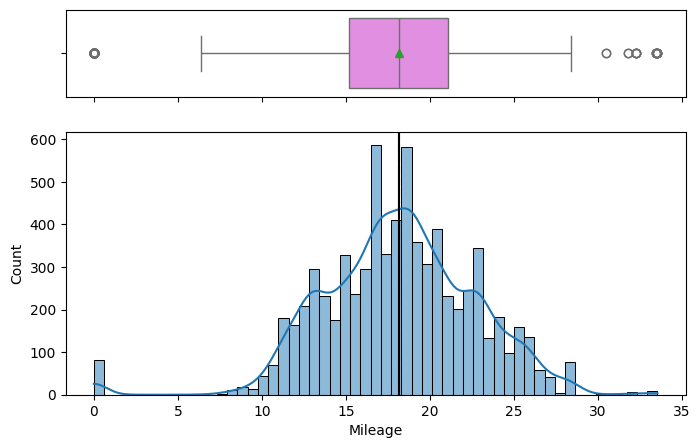

In [23]:
histogram_boxplot(df, 'Mileage')

 - For the 'Mileage' column, there are cars with 0 mileage which cannot be true. The values for the rows with missing data (0) will be replaced by the median value.

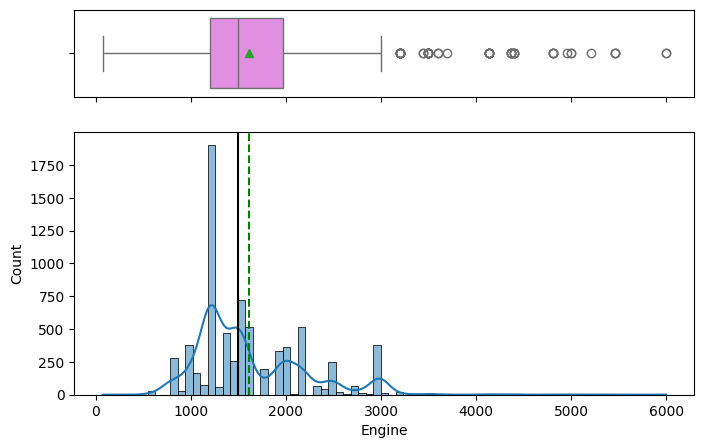

In [24]:
histogram_boxplot(df, 'Engine')

In [25]:
df[df['Engine']>5000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,log_kilometers_driven
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,NaN,30.0,10.470986
4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3000,Petrol,Automatic,Second,12.00,5461.0,421.0,2.0,NaN,90.0,8.006368
4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.10,5461.0,387.3,2.0,NaN,29.5,10.463103
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.60,5998.0,552.0,4.0,NaN,59.0,10.778956
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,NaN,120.0,8.779557
6354,Bentley Flying Spur W12,Bangalore,2008,31200,Petrol,Automatic,Second,10.20,5998.0,616.0,5.0,375.0,NaN,10.348173


 - The data in the 'Power' column has multiple modes, and the data is right-skewed. The cars with horsepower greater than 3000 are luxury/super/sport cars.

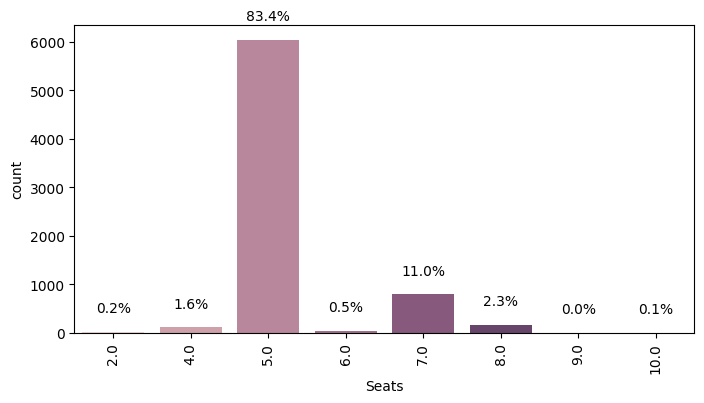

In [26]:
countplot(df, 'Seats')

 - Most of the cars (over 83%) in the used car dataset are 5-seater cars (most likely sedans), followed by 7-seater cars (SUVs).

In [27]:
# New Price column.
round((df[df['New_price'].isnull()].shape[0]/df.shape[0])*100,2)

86.13

 - Over 86% of the rows in the New Price column are missing values, it will make sense to drop this column.

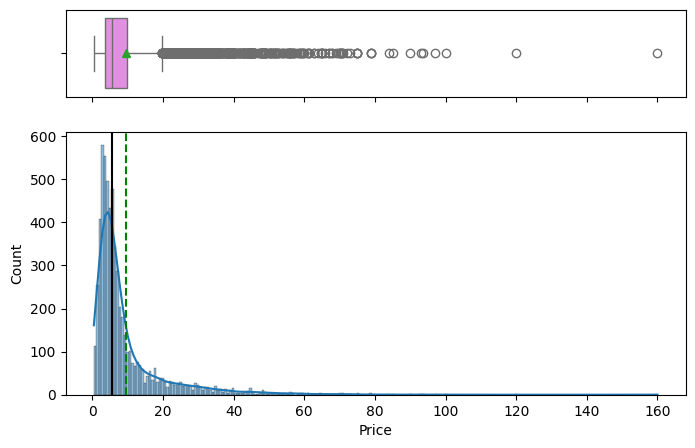

In [28]:
histogram_boxplot(df, 'Price')

In [29]:
df[df['Price']>100]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,log_kilometers_driven
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,230.0,160.0,10.126631
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,NaN,120.0,8.779557


 - The data is skewed towards the right, and the expensive cars are luxury cars.  It will make sense to use log transformation to the column to reduce skewness as one of the assumptions of linear regression model is that distribution for the dependent and independent variables should be normal.

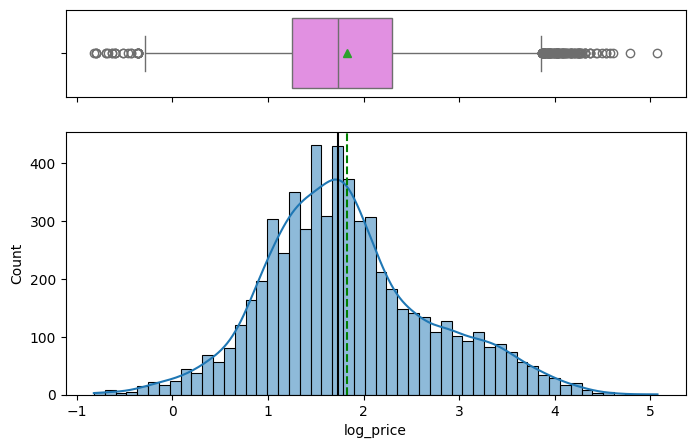

In [30]:
df['log_price'] = np.log(df['Price'])
histogram_boxplot(df, 'log_price')

- Using the log transformation reduces the skewness and normalizes the distribution, so it will make sense to add the transformed variable column into the dataset. 

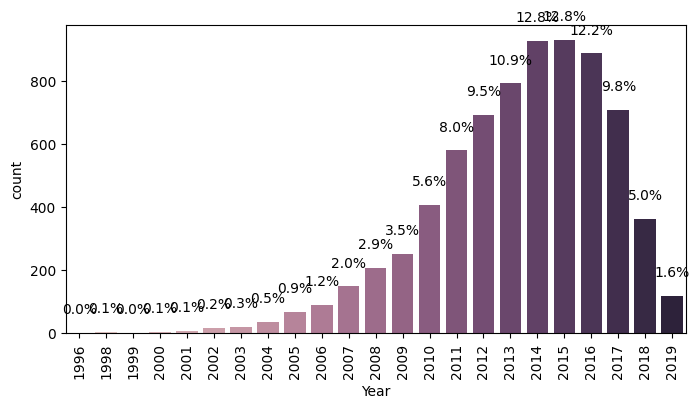

In [31]:
countplot(df, 'Year')

 - The countplot for the 'Year' column suggests that most cars were manufactured in the years after 2009.

## Bivariate Analysis

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

**Scatterplots**

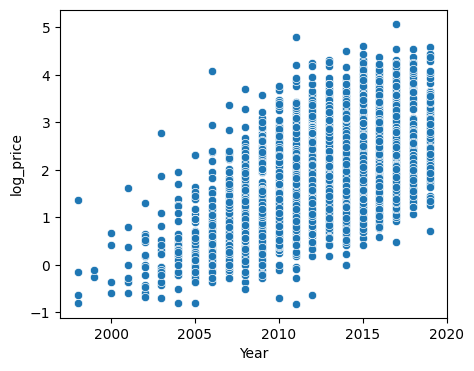

In [32]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, y = 'log_price', x = 'Year', markers = True);

 - We can see an increasing trend with the years. As the year is increasing, the value of 'log_price' is also increasing which is highly likely to be true as the newer car could have a higher price.

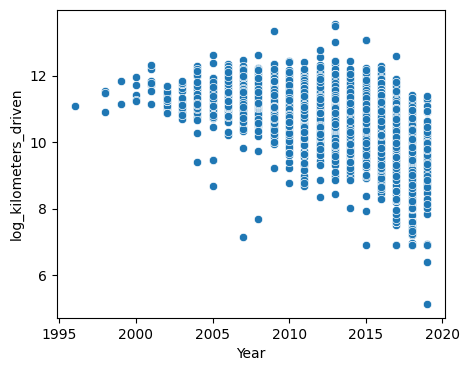

In [33]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, y = 'log_kilometers_driven', x = 'Year', markers = True);

 - We can see an decreasing trend with the years. As the year is increasing, the value of 'log_kilometers' is decreasing which is highly likely to be true as the older car has a higher probability of more number of kilometers on it.

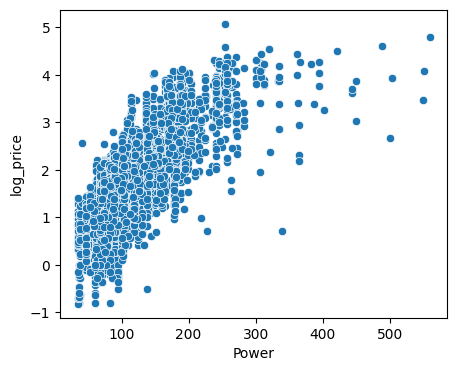

In [34]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, y = 'log_price', x = 'Power', markers = True);

 - An increasing trend of log_price with Power can be seen. It makes sense as the cars with higher power are likely to be super/luxury/sports cars which tend to be expensive.

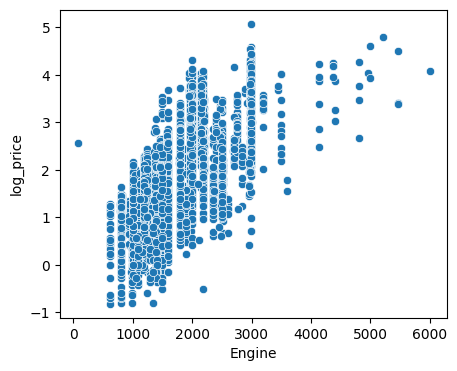

In [35]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, y = 'log_price', x = 'Engine', markers = True);

 - An increasing trend of 'log_price' with Engine can be seen. It makes sense as the cars with bigger engines are likely to be super/luxury/sports cars which tend to be expensive.

**Heatmap**

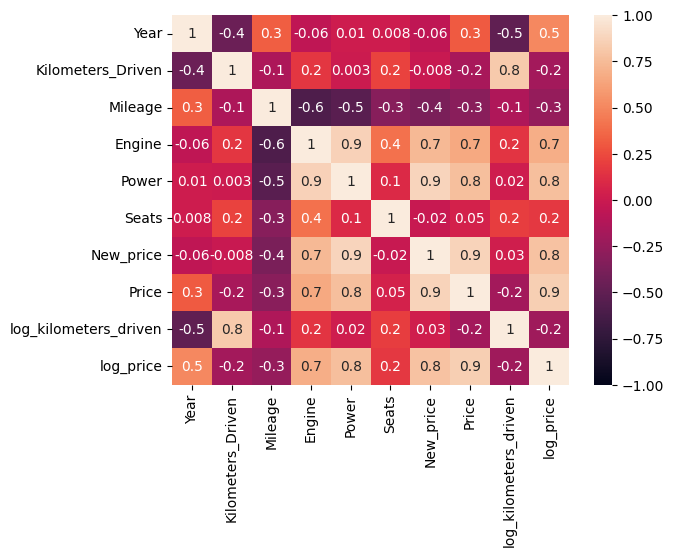

In [36]:
sns.heatmap(df.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = '0.1g');

 - From the above heatmap, it can be observed that the target variable is highly correlated to the 'Power', 'Engine', and 'New Price' columns. There is some correlation with the 'Year' column as well.
 - The results of the heatmap above make sense as price of the car will tend to increase with the 'Power' and 'Engine' specifications of the car. Also, if the car was manufactured recently, the price would tend to be high.

**Boxplot**

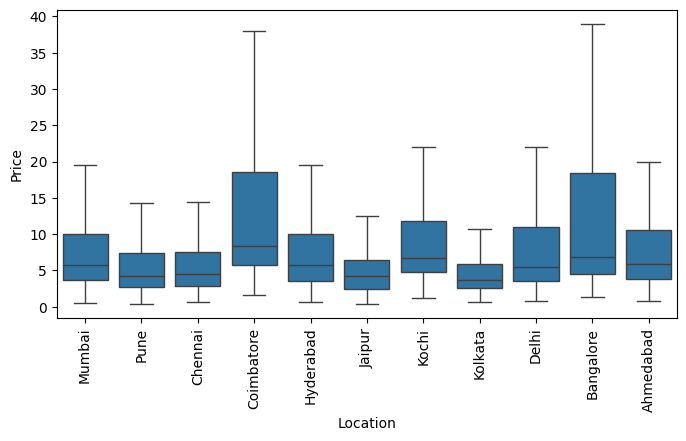

In [37]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df, x = 'Location', y = 'Price', showfliers = False) # not showing the outliers.
plt.xticks(rotation=90);

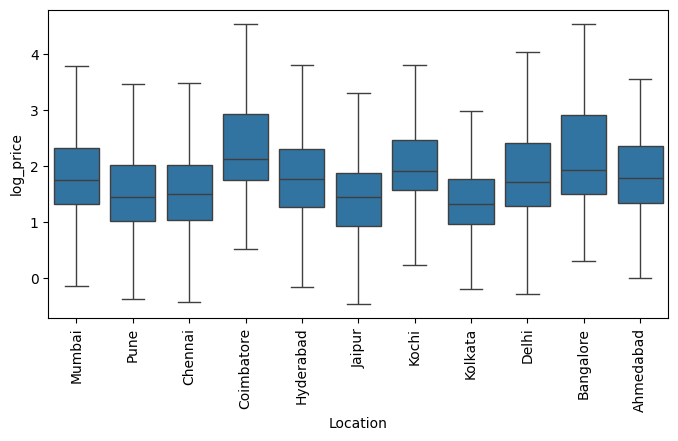

In [38]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df, x = 'Location', y = 'log_price', showfliers = False) # not showing the outliers.
plt.xticks(rotation=90);

 - It can be observed from the boxplot of Location and Price that the median value of 'Price' in Coimbatore was higher than the other cities, and the median value of 'Price' was lowest in Kolkata.

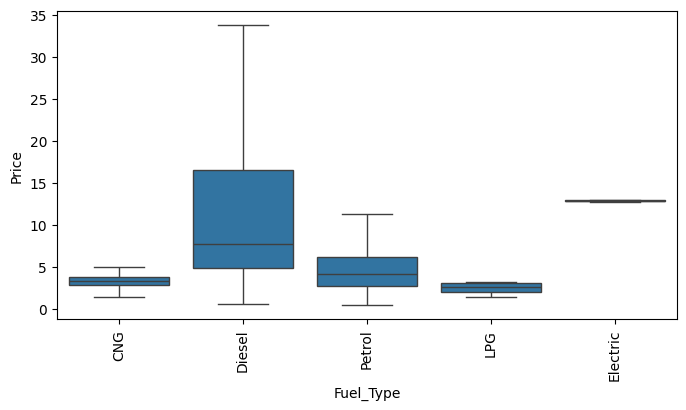

In [39]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df, x = 'Fuel_Type', y = 'Price', showfliers = False) # not showing the outliers.
plt.xticks(rotation=90);

 - It can be observed that the Electric cars are most expensive followed by Diesel fuel-type cars.

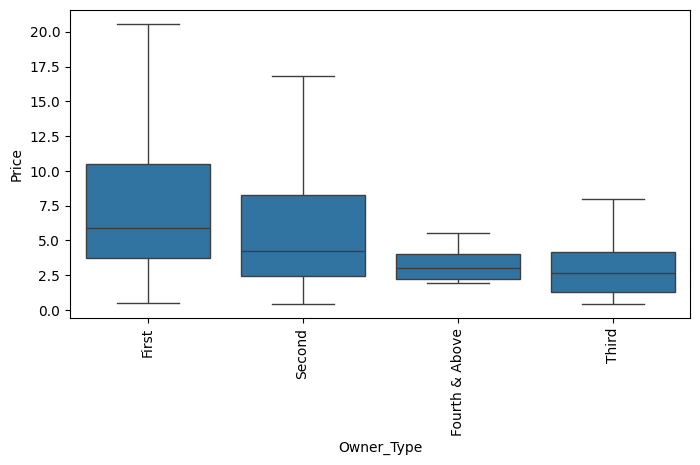

In [40]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df, x = 'Owner_Type', y = 'Price', showfliers = False) # not showing the outliers.
plt.xticks(rotation=90);

 - The median value of 'First' hand car tends to be higher than second and higher owner-type cars

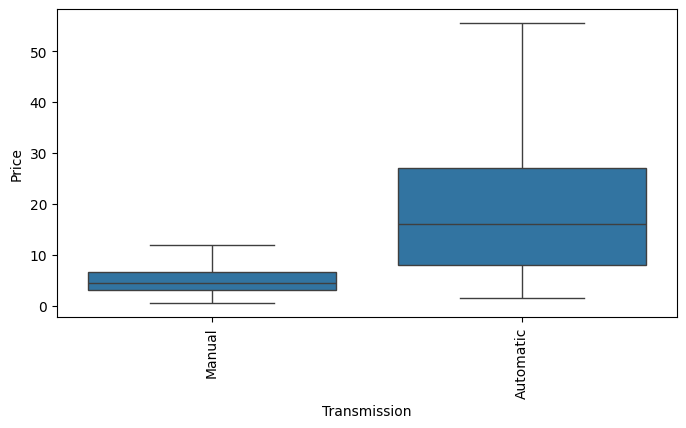

In [41]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df, x = 'Transmission', y = 'Price', showfliers = False) # not showing the outliers.
plt.xticks(rotation=90);

 - The median value of Automatic transmission car is higher than the Manual transmission car.

### Feature Engineering

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [42]:
df['Make'] = df.Name.str.split(' ', expand =True)[0]
df['Model'] = df.Name.str.split(' ').apply(lambda x: x[1:]).apply(lambda x: ' '.join(x))

In [43]:
df['Make'].nunique()

33

In [44]:
df['Model'].nunique()

2041

 - There are 33 different brands of cars. It will be easier to assign data to missing rows using this classification.

### Missing value treatment

In [45]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,log_kilometers_driven,log_price,Make,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai,Creta 1.6 CRDi SX Option


**Mileage**

In [46]:
df['Mileage'] = df['Mileage'].replace(0, np.nan)
df['Mileage'] = df.groupby(['Make'])['Mileage'].transform(lambda x: x.fillna(x.median()))
df[df['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,log_kilometers_driven,log_price,Make,Model
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,NaN,3.0,11.542484,1.098612,Smart,Fortwo CDI AT


In [47]:
df[df['Make']=='Smart']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,log_kilometers_driven,log_price,Make,Model
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,NaN,3.0,11.542484,1.098612,Smart,Fortwo CDI AT


In [48]:
df[df['Mileage']==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,log_kilometers_driven,log_price,Make,Model


In [49]:
df = df[df['Make']!='Smart']

 - All the zero values for Mileage have been replaced with the median value for the 'Make' of the car. There is one row where we still have missing data. It is because this car is one of a kind, so it will make sense to remove this row.

**Seats**

In [50]:
df['Seats'] = df.groupby(['Make'])['Seats'].transform(lambda x: x.fillna(x.median()))

In [51]:
df[df['Seats'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,log_kilometers_driven,log_price,Make,Model


 - All the nan values for Seats have been replaced with the median value for the 'Make' of the car.

**Engine**

In [52]:
df['Engine'] = df.groupby(['Make'])['Engine'].transform(lambda x: x.fillna(x.median()))

In [53]:
df[df['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,log_kilometers_driven,log_price,Make,Model


 - All the nan values for Seats have been replaced with the median value for the 'Make' of the car.

**Power**

In [54]:
df['Power'] = df.groupby(['Make'])['Power'].transform(lambda x: x.fillna(x.median()))

In [55]:
df[df['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,log_kilometers_driven,log_price,Make,Model
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,NaN,11.082143,NaN,Hindustan,Motors Contessa 2.0 DSL


In [56]:
df[df['Make']=='Hindustan']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,log_kilometers_driven,log_price,Make,Model
6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,NaN,11.082143,NaN,Hindustan,Motors Contessa 2.0 DSL


In [57]:
df = df[df['Make']!='Hindustan']

 - All the nan values for Make have been replaced with the median value for the 'Make' of the car. There is one row where we still have missing data. It is because this car is one of a kind, so it will make sense to remove this row.

**Price**

 - if there is missing data in the target variable, it is better to filter out the rows as if we impute it will most likely add bias to the model.

In [58]:
df = df[df['Price'].notnull()]

**New_Price**

In [59]:
df['New_price'] = df.groupby(['Make'])['New_price'].transform(lambda x: x.fillna(x.median()))

In [60]:
df.isnull().sum()

Name                       0
Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                    0
Engine                     0
Power                      0
Seats                      0
New_price                129
Price                      0
log_kilometers_driven      0
log_price                  0
Make                       0
Model                      0
dtype: int64

In [61]:
df = df[df['New_price'].notnull()]

In [62]:
df.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
log_kilometers_driven    0
log_price                0
Make                     0
Model                    0
dtype: int64

 - All the nan values for Seats have been replaced with the median value for the 'Make' of the car. Even after imputation, there were 129 rows of missing data in the 'New_price' column. Those rows were removed and now we have no missing rows in the entire dataset.
 - As a part of this step, we have imputed values with mean values using groupby function with the 'Make' for the car. There were still some missing rows which have been filtered out now.

## Important Insights from EDA and Data Preprocessing

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

 - All the nan values for Seats have been replaced with the median value for the 'Make' of the car. Even after imputation, there were 129 rows of missing data in the 'New_price' column. Those rows were removed and now we have no missing rows in the entire dataset.
 - As a part of this step, we have imputed values with mean values using groupby function with the 'Make' for the car. There were still some missing rows which have been filtered out now.
 - Log transformation for a couple of columns was considered as the gaussian distribution for those columns was highly skewed.
 - Feature engineering and outlier treatment were required and they were performed for a few variables.
- The min and max values of the 'S.No.' column, it seems to have as many values as rows (this column could be dropped after investigation).
- The mean and median value of 'Kilometers_driven' are quite far away from the max value (there could be some outliers in this column).
- The minimum 'Mileage' has been reported as 0 which cannot be true (further investigation needs to be done).
- The column 'New_Price' has so many missing values (it might make sense to drop the column, but can be investigated).
- The target variable --> 'Price' has missing values as well. It will make sense to filter out the rows as if we impute the values it will most likely add bias to the model.
- The number of unique values in the 'Name' column is 2041 and the mode value is 'Mahindra XUV500 W8 2WD'.
- The number of unique locations (cities) in the 'Location' column is 11 with 'Mumbai' being the mode.
- Similarly, there are 5 unique fuel types, 2 unique transmission types, and 4 unique owner types.
- From the heatmap, it can be observed that the target variable is highly correlated to the 'Power', 'Engine', and 'New Price' columns. There is some correlation with the 'Year' column as well.
- The results of the heatmap above make sense as price of the car will tend to increase with the 'Power' and 'Engine' specifications of the car. Also, if the car was manufactured recently, the price would tend to be high.

## Building Various Models


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### Split the Data

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:** 

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

**Solution**
 - We are going to drop the 'Name' and 'Make' columns because each of these columns has 1826 unique entries and they have no value to add to the model. If we consider these column and take dummies, there will be 1825x2 columns which will be added to the independent columns list which will make the model complex and it will computationally inefficeint.
 - We are going to drop 'Price' and 'log_price' column as they are the target variables and we need to predict them.
 - 'Kilometers_driven' column has already been transformed into 'log_kilometers_driven', that's why it was dropped.

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [63]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )
    return df_perf

In [64]:
X = df.drop(['Name', 'Price', 'log_price', 'Kilometers_Driven', 'Model'], axis = 1)
y = df[['log_price']]
X = pd.get_dummies(X, drop_first=True,  dtype = 'int')

# Creating an instance of the MinMax Scaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
X_scaled = scaler.fit_transform(X)

# Converting scaled values from numpy array to pandas dataframe.
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

In [65]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (4710, 48)
Shape of test set :  (1178, 48)


In [66]:
# Linear Model
linearmodel = LinearRegression()

# Fitting the model
linearmodel.fit(X_train, y_train)

# Model Performance on the test data, i.e., prediction
linear_model_perf_test = model_performance_regression(linearmodel, X_test, y_test)
linear_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.219734,0.172209,0.935257,0.932505


In [67]:
# Model Performance on the train data, i.e., prediction
linear_model_perf_train = model_performance_regression(linearmodel, X_train, y_train)
linear_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared
0,0.240116,0.178669,0.923869,0.923085


### Evaluate important variables of Linear Regression

In [68]:
# Adding an intercept column.
X_scaled = sm.add_constant(X_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_1 = sm.OLS(y, X_scaled)

# Fitting the Model
ols_res_1 = ols_model_1.fit()

print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1530.
Date:                Sat, 15 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:04:34   Log-Likelihood:                 150.71
No. Observations:                5888   AIC:                            -203.4
Df Residuals:                    5839   BIC:                             123.9
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [69]:
print(f"The R-squared for the model is {round(ols_res_1.rsquared,2)}.")
print(f"The Mean Squared Error for the model is {round(ols_res_1.mse_resid,2)}.")
print(f"The RMSE for the model is {round(np.sqrt(ols_res_1.mse_resid),2)}.")
print(f"The Mean Average Error for the model is {round(np.mean(np.abs(ols_res_1.resid)),2)}.")

The R-squared for the model is 0.93.
The Mean Squared Error for the model is 0.06.
The RMSE for the model is 0.24.
The Mean Average Error for the model is 0.18.


**Investigating for Multicollinearity**

 - The Variance Inflation factor for all the variables was investigated to check for the multicollinearity.

In [70]:
vif_series = pd.Series(
    [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])],
    index = X_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                        618.388689
Year                           2.169991
Mileage                        3.830812
Engine                        10.688105
Power                          9.655312
Seats                          2.629063
New_price                     28.973752
log_kilometers_driven          1.779730
Location_Bangalore             2.470261
Location_Chennai               2.956863
Location_Coimbatore            3.515606
Location_Delhi                 3.177703
Location_Hyderabad             3.807684
Location_Jaipur                2.659801
Location_Kochi                 3.549671
Location_Kolkata               3.085313
Location_Mumbai                4.007033
Location_Pune                  3.382042
Fuel_Type_Diesel              28.192886
Fuel_Type_Electric             1.056619
Fuel_Type_LPG                  1.199189
Fuel_Type_Petrol              29.391397
Transmission_Manual            2.273040
Owner_Type_Fourth & Above      1.016563
Owner_Type_Second         

 - The variable with highest VIF (Fuel_Type_Petrol) was removed and then VIF was calculated for rest of the variables.

In [71]:
X_scaled_new = X_scaled.drop("Fuel_Type_Petrol", axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(X_scaled_new.values, i) for i in range(X_scaled_new.shape[1])],
    index = X_scaled_new.columns,
    dtype = float)
vif_series

const                        445.488794
Year                           2.169862
Mileage                        3.620905
Engine                        10.532750
Power                          9.631658
Seats                          2.623361
New_price                     28.973389
log_kilometers_driven          1.768688
Location_Bangalore             2.470007
Location_Chennai               2.955965
Location_Coimbatore            3.514009
Location_Delhi                 3.177512
Location_Hyderabad             3.806693
Location_Jaipur                2.657618
Location_Kochi                 3.549585
Location_Kolkata               3.083936
Location_Mumbai                4.005010
Location_Pune                  3.381848
Fuel_Type_Diesel               2.669678
Fuel_Type_Electric             1.014390
Fuel_Type_LPG                  1.010130
Transmission_Manual            2.272879
Owner_Type_Fourth & Above      1.016560
Owner_Type_Second              1.180611
Owner_Type_Third               1.109539


 - The variable with highest VIF (New_price) was removed and then VIF was calculated for rest of the variables.

In [72]:
X_scaled_new_2 = X_scaled_new.drop("New_price", axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(X_scaled_new_2.values, i) for i in range(X_scaled_new_2.shape[1])],
    index = X_scaled_new_2.columns,
    dtype = float)
vif_series

const                        325.455585
Year                           2.169027
Mileage                        3.617135
Engine                        10.531612
Power                          9.366132
Seats                          2.623216
log_kilometers_driven          1.768369
Location_Bangalore             2.469934
Location_Chennai               2.955923
Location_Coimbatore            3.513923
Location_Delhi                 3.177494
Location_Hyderabad             3.806345
Location_Jaipur                2.657596
Location_Kochi                 3.549561
Location_Kolkata               3.083894
Location_Mumbai                4.004885
Location_Pune                  3.381637
Fuel_Type_Diesel               2.669678
Fuel_Type_Electric             1.014150
Fuel_Type_LPG                  1.010085
Transmission_Manual            2.272872
Owner_Type_Fourth & Above      1.016559
Owner_Type_Second              1.180593
Owner_Type_Third               1.109538
Make_BMW                       2.115834


 - The variable with highest VIF (Engine) was removed and then VIF was calculated for rest of the variables.

In [73]:
X_scaled_new_3 = X_scaled_new_2.drop("Engine", axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(X_scaled_new_3.values, i) for i in range(X_scaled_new_3.shape[1])],
    index = X_scaled_new_3.columns,
    dtype = float)
vif_series

const                        309.389607
Year                           2.156000
Mileage                        3.263623
Power                          4.080832
Seats                          2.453247
log_kilometers_driven          1.768335
Location_Bangalore             2.469907
Location_Chennai               2.955731
Location_Coimbatore            3.513692
Location_Delhi                 3.177390
Location_Hyderabad             3.805931
Location_Jaipur                2.657371
Location_Kochi                 3.549443
Location_Kolkata               3.083892
Location_Mumbai                4.004718
Location_Pune                  3.381379
Fuel_Type_Diesel               2.279684
Fuel_Type_Electric             1.012585
Fuel_Type_LPG                  1.010053
Transmission_Manual            2.272862
Owner_Type_Fourth & Above      1.016529
Owner_Type_Second              1.180514
Owner_Type_Third               1.109529
Make_BMW                       2.115069
Make_Datsun                    1.132701


 - The variable with highest VIF (Make_Maruti) was removed and then VIF was calculated for rest of the variables.

In [74]:
X_scaled_new_4 = X_scaled_new_3.drop("Make_Maruti", axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(X_scaled_new_4.values, i) for i in range(X_scaled_new_4.shape[1])],
    index = X_scaled_new_4.columns,
    dtype = float)
vif_series

const                        294.821212
Year                           2.153393
Mileage                        3.166719
Power                          3.657684
Seats                          2.393528
log_kilometers_driven          1.764668
Location_Bangalore             2.469239
Location_Chennai               2.954633
Location_Coimbatore            3.512210
Location_Delhi                 3.177385
Location_Hyderabad             3.805828
Location_Jaipur                2.656302
Location_Kochi                 3.549063
Location_Kolkata               3.083879
Location_Mumbai                4.003758
Location_Pune                  3.380334
Fuel_Type_Diesel               2.129452
Fuel_Type_Electric             1.012563
Fuel_Type_LPG                  1.009962
Transmission_Manual            2.115660
Owner_Type_Fourth & Above      1.016267
Owner_Type_Second              1.179899
Owner_Type_Third               1.109487
Make_BMW                       1.642568
Make_Datsun                    1.019924


 - Now all the variables have VIF less than 5, the OLS model was run on the reduced variables now.

In [75]:
ols_model_2 = sm.OLS(y, X_scaled_new_4)

# Fitting the Model
ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1485.
Date:                Sat, 15 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:04:38   Log-Likelihood:                -167.72
No. Observations:                5888   AIC:                             425.4
Df Residuals:                    5843   BIC:                             726.1
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

 - We are looking for overall significant variables.
 - All the variables whose coefficients were not significant (p-value > 0.05) were removed ("Location_Chennai", "Fuel_Type_LPG", "Owner_Type_Fourth & Above", "Make_Isuzu", "Make_Jeep", "Make_Mitsubishi", "Make_Porsche", "Make_Volvo"). 

In [76]:
X_scaled_new_5 = X_scaled_new_4.drop([
    "Location_Chennai", "Fuel_Type_LPG", "Owner_Type_Fourth & Above", "Make_Isuzu", "Make_Jeep",
    "Make_Mitsubishi", "Make_Porsche", "Make_Volvo"], axis=1)

ols_model_3 = sm.OLS(y, X_scaled_new_5)

# Fitting the Model
ols_res_3 = ols_model_3.fit()

print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1815.
Date:                Sat, 15 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:04:38   Log-Likelihood:                -171.05
No. Observations:                5888   AIC:                             416.1
Df Residuals:                    5851   BIC:                             663.3
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.01

In [77]:
print(f"The R-squared for the model is {round(ols_res_3.rsquared,2)}.")
print(f"The Mean Squared Error for the model is {round(ols_res_3.mse_resid,2)}.")
print(f"The RMSE for the model is {round(np.sqrt(ols_res_3.mse_resid),2)}.")
print(f"The Mean Average Error for the model is {round(np.mean(np.abs(ols_res_3.resid)),2)}.")

The R-squared for the model is 0.92.
The Mean Squared Error for the model is 0.06.
The RMSE for the model is 0.25.
The Mean Average Error for the model is 0.19.


In [78]:
significant_vars = X_scaled_new_5.columns[1:]
print(f"Overall Significant variables of Linear Regression are: {significant_vars.tolist()}")

Overall Significant variables of Linear Regression are: ['Year', 'Mileage', 'Power', 'Seats', 'log_kilometers_driven', 'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Transmission_Manual', 'Owner_Type_Second', 'Owner_Type_Third', 'Make_BMW', 'Make_Datsun', 'Make_Fiat', 'Make_Ford', 'Make_Honda', 'Make_Hyundai', 'Make_Jaguar', 'Make_Land', 'Make_Mahindra', 'Make_Mercedes-Benz', 'Make_Mini', 'Make_Nissan', 'Make_Renault', 'Make_Skoda', 'Make_Tata', 'Make_Toyota', 'Make_Volkswagen']


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_new_5, y, test_size = 0.3, random_state = 1)

# Linear Model
linearmodel = LinearRegression()

# Fitting the model
linearmodel.fit(X_train, y_train)

# Model Performance on the test data, i.e., prediction
linear_model_perf_test = model_performance_regression(linearmodel, X_test, y_test)
linear_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.240871,0.184062,0.921587,0.919909


In [80]:
# Model Performance on the train data, i.e., prediction
linear_model_perf_train = model_performance_regression(linearmodel, X_train, y_train)
linear_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared
0,0.253325,0.188917,0.91568,0.914916


**SUMMARY**
- The X features were scaled before running the model.
- In order to invesitgate for multicollinearity, VIF was measured, and the variable with highest VIF was removed one at a time untill VIF for all the variables was less than 5.
- Only the overall significant vairables were considered for the final linear model. The non-significant variables were removed.
- The R-squared for the linear model is 0.92 and the RMSE is 0.25

**RIDGE**

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_new_5, y, test_size=0.2, random_state=1)

# Define the model with an alpha value (regularization parameter)
ridge_model = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

Ridge()

In [82]:
ridge_model_perf_test = model_performance_regression(ridge_model, X_test, y_test)
ridge_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.23304,0.180546,0.927178,0.924815


In [83]:
ridge_model_perf_train = model_performance_regression(ridge_model, X_train, y_train)
ridge_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared
0,0.254164,0.190333,0.914701,0.914025


**LASSO**

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_new_5, y, test_size=0.2, random_state=1)

# Define the model with an alpha value (regularization parameter)
lasso_model = Lasso(alpha=1.0)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

Lasso()

In [85]:
lasso_model_perf_test = model_performance_regression(lasso_model, X_test, y_test)
lasso_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.863754,0.673083,-0.000412,-0.032881


In [86]:
lasso_model_perf_train = model_performance_regression(lasso_model, X_train, y_train)
lasso_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared
0,0.870244,0.675508,0.0,-0.00792


 - The scaled and reduced features were considered for Ridge and Lasso Regression tasks.
 - The results of Ridge Regression are not very different from the linear regression model.
 - However, for lasso regression, poor performance was observed.
 - Based on the observed responses, it will not make much of a difference to consider Ridge Regression model.

### Decision Tree

In [87]:
X = df.drop(['Name', 'Price', 'log_price', 'Kilometers_Driven', 'Model'], axis = 1)
y = df[['log_price']]
X = pd.get_dummies(X, drop_first=True,  dtype = 'int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [88]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (4710, 48)
Shape of test set :  (1178, 48)


In [89]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(X_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, X_test, y_test)
dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.253065,0.180781,0.914126,0.910475


In [90]:
dt_regressor_perf_train = model_performance_regression(dt_regressor, X_train, y_train)
dt_regressor_perf_train

,RMSE,MAE,R-squared,Adj. R-squared
0,0.002166,0.00011,0.999994,0.999994


### Hyperparameter Tuning: Decision Tree

In [91]:
dt_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
dt_parameters = {'max_depth': range(2, 10),
                 'criterion': ['squared_error', 'poisson'],
                 'min_samples_split': range(2, 21),
                 'min_samples_leaf': range(1, 21),
                 'max_features': ['sqrt', 'log2']}

# Run the grid search
dt_grid_obj = GridSearchCV(dt_tuned, dt_parameters, scoring = 'neg_mean_squared_error', cv = 5)

dt_grid_obj = dt_grid_obj.fit(X_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
dt_tuned_regressor = dt_grid_obj.best_estimator_

dt_tuned_regressor.fit(X_train, y_train)

# Model Performance on the test data
dt_tuned_regressor_perf_test = model_performance_regression(dt_tuned_regressor, X_test, y_test)

dt_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.34167,0.264413,0.843465,0.83681


In [92]:
dt_tuned_regressor_perf_train = model_performance_regression(dt_tuned_regressor, X_train, y_train)

dt_tuned_regressor_perf_train

,RMSE,MAE,R-squared,Adj. R-squared
0,0.329187,0.253594,0.856912,0.855438


**Feature Importance**

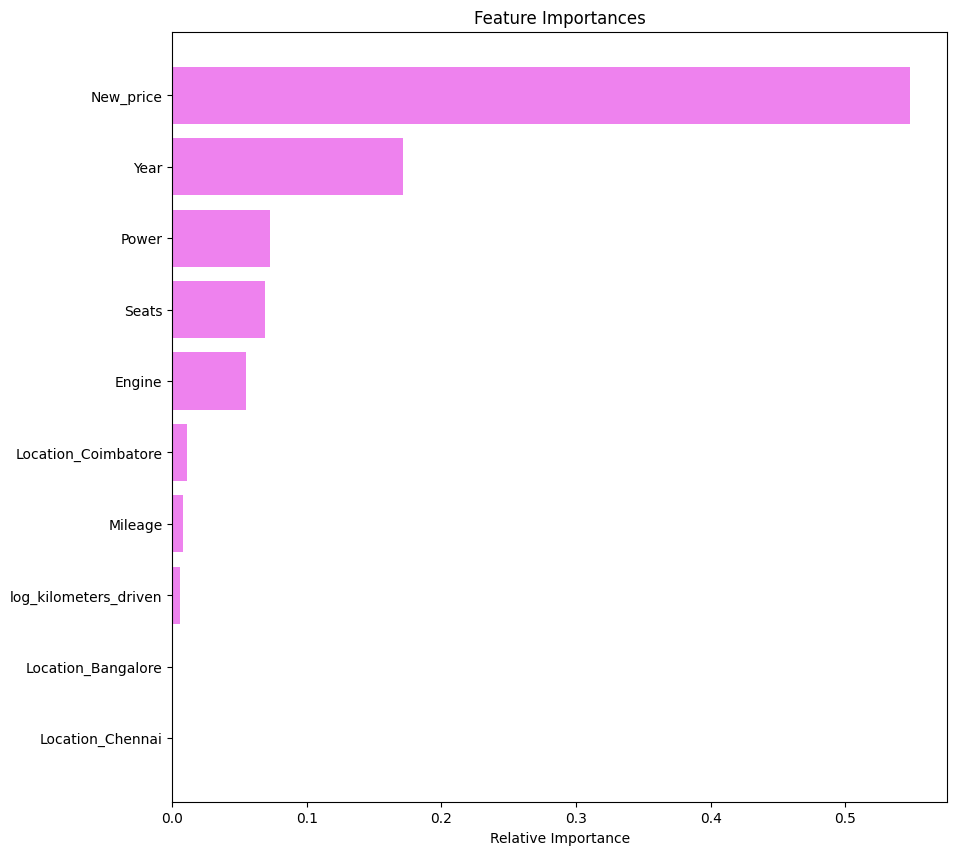

In [93]:
# Plotting the feature importance
features = list(X.columns)
importances = dt_tuned_regressor.feature_importances_[:10]
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 - The results obtained after hyperparameter tuning declined the scoring metrics, so it will not make sense to consider hyperparameter tuning.
 - After investigating for important features, it was observed that "New Price", "Year", "Power", "Seats", and "Engine" were the top 5  variables.

### Random Forest

In [94]:
X = df.drop(['Name', 'Price', 'log_price', 'Kilometers_Driven', 'Model'], axis = 1)
y = df[['log_price']]
X = pd.get_dummies(X, drop_first=True,  dtype = 'int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [95]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test = model_performance_regression(rf_regressor, X_test, y_test)

rf_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.187184,0.135023,0.953018,0.95102


In [96]:
rf_regressor_perf_train = model_performance_regression(rf_regressor, X_train, y_train)

rf_regressor_perf_train

,RMSE,MAE,R-squared,Adj. R-squared
0,0.077246,0.051909,0.992121,0.99204


### Hyperparameter Tuning: Random Forest

In [97]:
rf_tuned = RandomForestRegressor(random_state = 1)

# Grid of parameters to choose from
rf_parameters = {"n_estimators": [100, 110, 120],
                 "max_depth": [5, 7, None],
                 "max_features": [0.8, 1]
                }

# Run the grid search
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv = 5)

rf_grid_obj = rf_grid_obj.fit(X_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = rf_grid_obj.best_estimator_

rf_tuned_regressor.fit(X_train, y_train)

# Model Performance on the test data
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, X_test, y_test)

rf_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.184632,0.13303,0.95429,0.952347


In [98]:
rf_tuned_regressor_perf_train = model_performance_regression(rf_tuned_regressor, X_train, y_train)

rf_tuned_regressor_perf_train

,RMSE,MAE,R-squared,Adj. R-squared
0,0.075466,0.0511,0.99248,0.992403


**Feature Importance**

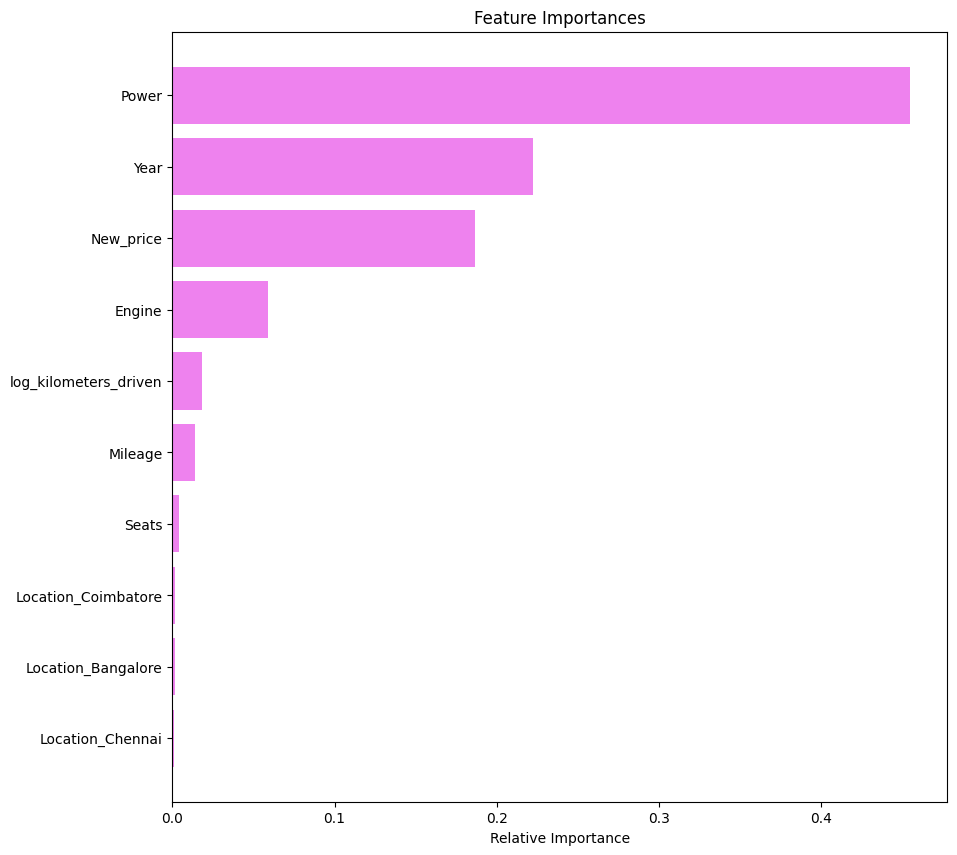

In [99]:
# Plotting the feature importance
features = list(X.columns)
importances = rf_tuned_regressor.feature_importances_[:10]
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 - The results obtained after hyperparameter tuning improved the scoring metrics, so it will make sense to consider hyperparameter tuning.
 - After investigating for important features, it was observed that "Power", "Year", "New Price" , "Engine", and "Log Kilometers Driven" were the top 5  variables.

### Comparison of all the models

In [100]:
models_test_comp_df = pd.concat([
    linear_model_perf_train.T, linear_model_perf_test.T,
    ridge_model_perf_train.T, ridge_model_perf_test.T,
    lasso_model_perf_train.T, lasso_model_perf_test.T,
    dt_regressor_perf_train.T, dt_regressor_perf_test.T,
    dt_tuned_regressor_perf_train.T, dt_tuned_regressor_perf_test.T,
    rf_regressor_perf_train.T, rf_regressor_perf_test.T,
    rf_tuned_regressor_perf_train.T, rf_tuned_regressor_perf_test.T], axis=1)
models_test_comp_df.columns = [
    "Linear Model Train", "Linear Model Test","Ridge Regression Train","Ridge Regression Test",
    "Lasso Regression Train","Lasso Regression Test","Decision tree regressor Train", "Decision tree regressor Test", 
    "Decision Tree Tuned regressor Train", "Decision Tree Tuned regressor Test","Random Forest regressor Train",
    "Random Forest regressor Test", "Random Forest Tuned regressor Train", "Random Forest Tuned regressor Test"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Linear Model Train,0.253325,0.188917,0.915680,0.914916
Linear Model Test,0.240871,0.184062,0.921587,0.919909
Ridge Regression Train,0.254164,0.190333,0.914701,0.914025
Ridge Regression Test,0.233040,0.180546,0.927178,0.924815
Lasso Regression Train,0.870244,0.675508,0.000000,-0.007920
Lasso Regression Test,0.863754,0.673083,-0.000412,-0.032881
Decision tree regressor Train,0.002166,0.000110,0.999994,0.999994
Decision tree regressor Test,0.253065,0.180781,0.914126,0.910475
Decision Tree Tuned regressor Train,0.329187,0.253594,0.856912,0.855438
Decision Tree Tuned regressor Test,0.341670,0.264413,0.843465,0.836810


## Conclusions and Recommendations

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
 - In order to come up with a good model, wide range of models were built and their performances were evaluated.
 - The target variable over here was the log of Price. The log of target variable was taken as its distribution was highly skewed.
 - After the linear regression model was built, variance inflation factor was used to investigate and remove multicollinearity, and then model summary report was analyzed to drop insignificant features.
 - In addition to linear regression, Lasso and Ridge Regression tests were performed as well.
 - Following that, decision tree and random forest approaches were assessed along with hyperparameter tuning for each of the approaches.
 - In order to evaluate each model's performance, various metrics such as root mean squared difference (RMSE), mean absolute error (MAE), R-squared, and adjusted R-squared on the 'TRAIN' and 'TEST DATA' were measured.
 - It was observed that the **Random Forest Tuned Regressor** approach yielded the minimum RMSE and MAE along with highest R-squared and adjusted R-squared.
 - Overfitting was observed for the **Decision Tree Regressor** approach as the RMSE and MAE were extremely low and the R-squared and adjusted R-squared were high for the **train** data. However, the RMSE and MAE were relatively higher and R-squares were relatively lower for the **test** data.
 - There is some scope to slightly improve the results further by investigating more hyperparameters for tuning. However, that approach could be computationally expensive.

**2. Refined insights:** 
- After the interpretation of various models, it is clear that the features --> 'Power', 'Year', 'New Price', 'log_kilometers_driven', 'Engine', and 'Mileage' are the factors that affect the price of the car the most.
- Since these features have the strongest impact on used price, it will be essential to ensure data collection and cleaning processes prioritize their accuracy and completeness.
- The used cars can be grouped into segments based on these key features which could allow for more targeted pricing strategies within each segment.
- For marketing efforts, focus on emphasizing these features could yield (e.g., horsepower for performance-oriented cars, fuel efficiency, etc.) better sales.
- For business purposes, prioritization on acquisition of high-demand cars should be done.
- The proposed model could potentially enable business stakeholders to set optimal prices for each vehicle, leading to increased revenue through data-driven pricing strategies.
- This model will equip business stakeholders with the ability to implement effective differential pricing, ultimately increasing profitability.

**3. Proposal for the final solution design:** 
-  In order to propose a final solution, extensive EDA, univariate and bivariate analysis, on all the variables in the dataset was performed.
-  Missing values were then treated using the relationship between variables.
-  A linear regression model was built using all the features.
-  Multicollinearity from the data was removed and the model summary report was analyzed to drop insignificant features to come up with a linear model.
-  Lasso and Ridge regression approaches were investigated with the reduced features.
-  Finally, decision tree and random forest approaches were assessed along with hyperparameter tuning for each of the approaches.
-  All these models were evaluated using different evaluation metrics, and random forest tuned regressor model was proposed as it reported highest R-squared and adjusted R-squared along with minimum RMSE and MAE on the test datasets.

# Executive Summary

The booming Indian used car market suffers from a **lack of transparency and objectivity** in pricing. Unlike the new car market, used car values are highly uncertain due to factors like mileage, brand, model, and year. In a bid to revolutionize the Indian used car market, a highly accurate used car pricing model using a **Random Forest tuned regressor model** (as evidenced by lowest RMSE and MAE, along with the high R-squared and adjusted R-squared values  for training and test datasets in comparison to other models being explored) was developed for Cars4U. This data-driven solution will empower the company to recommend **optimal asking prices, maximizing seller revenue and attracting buyers with competitive offerings**. The model helps to identify key factors influencing price such as mileage, brand, model, year, and engine specifications. By leveraging this model's superior performance and integrating it into their platform, Cars4U can establish itself as a **trusted partner, fostering transparency and customer satisfaction**. Furthermore, this approach has the potential to drive market growth and stability. To maximize the model's effectiveness, prioritization on **data quality** for key features and development of targeted marketing strategies based on car segments is recommended. Integration of random forest tuned regressor model into Cars4U's platform to provide real-time price recommendations for sellers, along with developing targeted marketing strategies based on car segments and their defining features is suggested.

## Problem Summary

The booming Indian used car market suffers from a **lack of transparency and objectivity in pricing**. Unlike the new car market, used car values are highly uncertain due to factors like mileage, brand, model, and year. This makes it difficult for sellers to determine fair asking prices, leading to:
- **lost revenue** for sellers due to underpricing,
- **disgruntled customers** due to overpriced listings, and
- **inefficient market** with slow inventory turnover.

Therefore, there is a challenge to develop a data-driven solution to predict used car prices accurately. The underlying objective of this project is to create an accurate used car pricing model that should:
- leverage machine learning to analyze vast amounts of data and identify key pricing factors,
- account for the impact of features like mileage, brand, model, and year, and
- address challenges like data quality, handling categorical features, and geographical variations.

The proposed pricing model (random forest tuned regressor model) will help Cars4U **empower sellers, enhance customer satisfaction, and drive market growth** by increasing seller revenue, reducing inventory turnover time, improving customer experience, and increasing market stability and efficiency through data-driven insights.

## Solution Design

A wide range of models were explored as a part of developing a data-driven solution to predict used car prices accurately including the linear regression model, ridge regression, lasso regression, decision tree (with and without hypterparameter tuning), and random forest model (with and without hypterparameter tuning) using the test and training datasets (to evaluate for overfitting). After the linear regression model was built, variance inflation factor was used to investigate and remove multicollinearity, and then model summary report was analyzed to drop insignificant features. The target variable over here was the log of Price. The log of target variable was taken as its distribution was highly skewed.
 - The following table shows the evaluation metrics for the various models that were considered for the test and training datasets.
 - Overfitting was observed for the Decision Tree Regression model as the model performs well on the training data.
 - **Random forest tuned regressor** was the pick amongst the models being compared because of minimum RMSE and MAE along with the highest R-squared and adjusted R-squared for training and test datasets.
 - The key factors influencing price were identified to be mileage, brand, model, year, and engine specifications based on the model results.

In [101]:
models_test_comp_df.T

,RMSE,MAE,R-squared,Adj. R-squared
Linear Model Train,0.253325,0.188917,0.915680,0.914916
Linear Model Test,0.240871,0.184062,0.921587,0.919909
Ridge Regression Train,0.254164,0.190333,0.914701,0.914025
Ridge Regression Test,0.233040,0.180546,0.927178,0.924815
Lasso Regression Train,0.870244,0.675508,0.000000,-0.007920
Lasso Regression Test,0.863754,0.673083,-0.000412,-0.032881
Decision tree regressor Train,0.002166,0.000110,0.999994,0.999994
Decision tree regressor Test,0.253065,0.180781,0.914126,0.910475
Decision Tree Tuned regressor Train,0.329187,0.253594,0.856912,0.855438
Decision Tree Tuned regressor Test,0.341670,0.264413,0.843465,0.836810


**Table 1. Evaluation metrics for various models on train and test datasets being compared.**

- Furthermore, according the tuned random forest regressor model, **New Price** is the most important feature, followed by **Year, Power, Seats, and Engine**.
- Since these features have the strongest impact on used price, it will be essential to ensure data collection and cleaning processes prioritize their accuracy and completeness.
- The used cars can be grouped into segments based on these key features which could allow for more targeted pricing strategies within each segment.
- For marketing efforts, focus on emphasizing these features could yield (e.g., horsepower for performance-oriented cars, fuel efficiency, etc.) better sales.
- For business purposes, prioritization on acquisition of high-demand cars should be done.

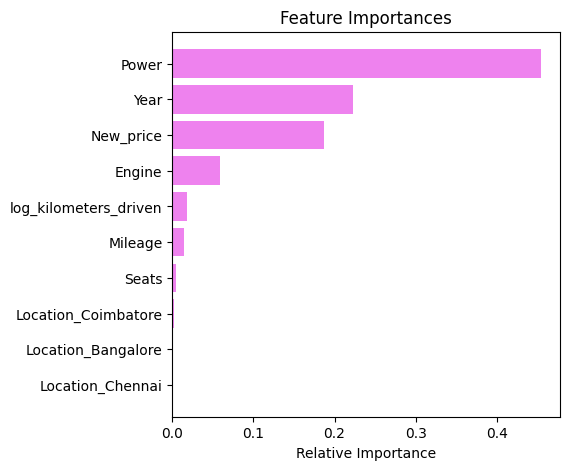

In [102]:
plt.figure(figsize = (5, 5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Figure 1. Feature Importance according to the Random Forest tuned regressor model.**

## Analysis and Key Insights

To draw accurate insights from the predictive model, **extensive EDA** was conducted. **Feature engineering and outlier treatment** were performed for the columns where it was required. All the nan values for 'Seats' column were replaced with the median value for the 'Make' of the car. Even after imputation, there were 129 rows of missing data in the 'New_price' column. Those rows were removed and there were no missing rows in the entire dataset. Log transformation for a couple of columns was considered as the gaussian distribution for those columns was highly skewed. The min and max values of the 'S.No.' column seemed to have as many values as rows (this column was dropped after investigation). The mean and median value of 'Kilometers_driven' were quite far away from the max value (outliers were detected and removed). The minimum 'Mileage' was reported as 0 which cannot be true (median values based on the Make of the car were imputed). The column 'New_Price' had so many missing values which were imputed too. The target variable --> 'Price' had missing values as well which were dropped so as to not add bias to the model. Most cars in the inventory were from Mumbai. From the heatmap, it can be observed that the **target variable is highly correlated to the 'Power', 'Engine', 'Year', and 'New Price'** columns. The results of the heatmap above make sense as **price of the car will tend to increase with the 'Power' and 'Engine' specifications of the car**. Also, if the car was manufactured recently, the price would tend to be high.

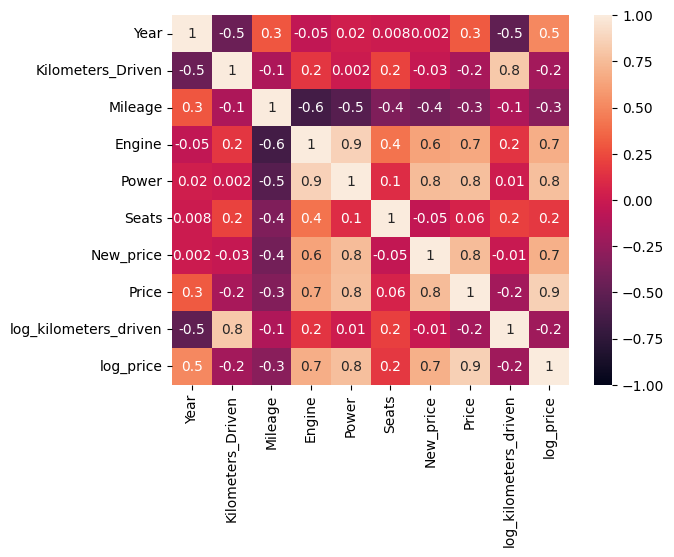

In [103]:
sns.heatmap(df.corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, fmt = '0.1g');

**Figure 2. Heat map of the independent variables along with the dependent variable.**

## Recommendations for Implementation

The proposed data science approach offers a **more scalable, efficient, and unbiased solution** for used car price prediction. It will be beneficial for the stakeholders in market, which could lead to a more efficient and transparent used car buying and selling experience. By leveraging the power of data science, a used car price prediction model that considers a multitude of relevant features and market data was developed and several recommendations were made. This model could:
- **Analyze large datasets** of used car listings to identify key factors influencing price.
- **Learn from historical sales data** to understand market trends and price fluctuations.
- **Predict the fair market value** of a used car based on its specific features and condition.

This approach could lead to **improved efficiency, market transparency, and competitive advantage** to the business stakeholders.

The **key risks and challenges** with this approach would be associated with the **data quality issues, model bias, and market fluctuations**. Inaccurate or incomplete data can negatively impact model performance. The model could potentially inherit biases present in the training data. Rapid changes in the market trends could require model updates.

For the purpose of used car price prediction, it was observed that the features --> 'Power', 'Year', 'New Price', 'log_kilometers_driven', 'Engine', and 'Mileage' affected the price of the car the most. Therefore, it will be essential to **ensure data collection and cleaning processes** prioritize their accuracy and completeness. The Random Forest regression model with hyperparameter tuning could be integrated into Cars4U's platform. An interface for sellers to input car details and receive real-time price recommendations could be developed. The used cars can be **grouped into segments** based on these key features which could allow for more targeted pricing strategies within each segment. For marketing efforts, focus on emphasizing these features could yield (e.g., horsepower for performance-oriented cars, fuel efficiency, etc.) **better sales**. For business purposes, prioritization on **acquisition of high-demand cars** should be done. The proposed model could potentially enable business stakeholders to **set optimal prices** for each vehicle, leading to increased revenue through data-driven pricing strategies. This model will equip business stakeholders with the ability to **implement effective differential pricing, ultimately increasing profitability**.

For **further analysis and associated problems**, exploring incorporating of **additional data sources** like car condition reports or regional market variations could be considered. In addition to that, **investigating the feasibility of predicting future price trends** for informed pricing strategies could be done.

By addressing these recommendations and challenges, Cars4U can unlock the full potential of the data science approach and revolutionize the used car buying and selling experience in India.

In [105]:
sys.exit()

SystemExit: 